<a href="https://colab.research.google.com/github/eduzegarra/grade_01/blob/main/proyecto_papa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Papa Sostenible: Integración, Limpieza y Análisis Exploratorio**


Librerías externas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Lectura e integración de base de datos**

Montar el drive para leer base de datos de Drive Personal

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lectura de base de datos original en Excel

In [3]:
ruta = 'drive/My Drive/ML/'

Leemos primer libro del archivo Excel (volumen) asignado a objeto "vol"

In [4]:
vol = pd.read_excel(ruta + 'base_completa_1997_2021.xls', sheet_name='volumen')
vol

,producto,year,Variable,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,Papa Amarilla,1997,Abancay,NaN,NaN,NaN,NaN,NaN,NaN,16.8,22.2,NaN,NaN,NaN,NaN
1,Papa Amarilla,1997,Ambo,97.80,30.0,26.4,12.0,NaN,NaN,NaN,NaN,NaN,10.56,10.60,51.9
2,Papa Amarilla,1997,Andahuaylas,NaN,NaN,NaN,NaN,NaN,NaN,89.4,87.0,NaN,96.12,20.16,NaN
3,Papa Amarilla,1997,Arequipa,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Papa Amarilla,1997,Ascope,15.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,Papa Yungay,2021,Pasco,76.00,104.0,228.0,308.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4206,Papa Yungay,2021,Sanchez Carrion,NaN,29.0,243.0,250.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,Papa Yungay,2021,Santiago De Chuco,NaN,57.0,20.0,118.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4208,Papa Yungay,2021,Tarma,897.00,1436.0,1012.0,995.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vol.rename(columns={'m_1':'m_01','m_2':'m_02','m_3':'m_03','m_4':'m_04','m_5':'m_05','m_6':'m_06',
                    'm_7':'m_07','m_8':'m_08', 'm_9':'m_09'}, inplace=True)

Leemos segundo libro (precios) asignado a objeto "pre"

In [6]:
pre = pd.read_excel(ruta + 'base_completa_1997_2021.xls', sheet_name='precio')
pre.head()

,producto,year,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,Papa Amarilla,1997,0.90,0.87,0.80,0.71,0.78,1.01,1.10,1.20,1.09,0.92,1.05,1.00
1,Papa Blanca,1997,0.56,0.47,0.40,0.46,0.61,0.75,0.74,0.78,0.84,0.78,0.68,0.65
2,Papa Canchan,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Papa Color,1997,0.55,0.49,0.44,0.48,0.61,0.75,0.74,0.79,0.85,0.80,0.71,0.67
4,Papa Huamantanga,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pre.rename(columns={'m_1':'m_01','m_2':'m_02','m_3':'m_03','m_4':'m_04','m_5':'m_05','m_6':'m_06',
                    'm_7':'m_07','m_8':'m_08', 'm_9':'m_09'}, inplace=True)

La columna 'Variable' identifica la provincia, cambiamos el nombre de la columna

In [8]:
vol.rename(columns={'Variable':'provincia'}, inplace=True)

Las columnas m_01 a m_12 denotan meses. Necesitamos convertir al mes como una variable, para tener en cada fila una observacion, pasar base en formato ancho a largo (wide to long) usando el método **melt**

In [9]:
vol_long=pd.melt(vol,id_vars=['producto','year','provincia'], 
                var_name='mes', value_name='volumen')

Lo mismo con la base de precios

In [25]:
pre_long=pd.melt(pre,id_vars=['producto','year'], 
                var_name='mes', value_name='precio')

Damos una mirada a cada una de estas bases de datos

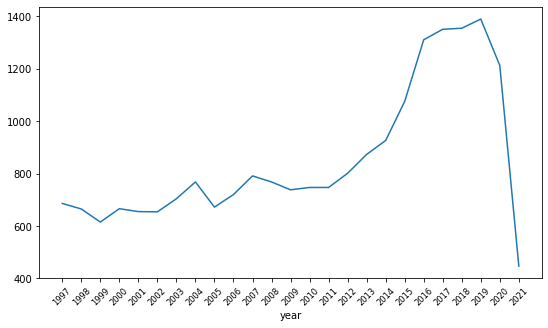

In [11]:
plt.figure(figsize=(9,5))
vol_long.groupby(vol_long.year)['volumen'].count().plot()
rr=np.arange(1997,2022,1)
plt.xticks(rr,rotation=45, fontsize='small')
plt.show()

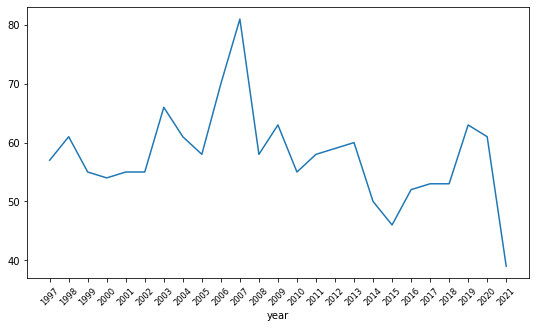

In [12]:
plt.figure(figsize=(9,5))
vol_long.groupby(vol_long.year)['provincia'].nunique().plot()
rr=np.arange(1997,2022,1)
plt.xticks(rr,rotation=45, fontsize='small')
plt.show()

In [ ]:
vol_long.groupby(vol_long.year)['producto'].nunique()

year
1997     4
1998     4
1999     4
2000     4
2001     4
2002     4
2003     4
2004     4
2005     4
2006     4
2007     7
2008     9
2009    10
2010    10
2011     8
2012    11
2013    11
2014    11
2015    11
2016    11
2017    11
2018    11
2019    11
2020    11
2021    10
Name: producto, dtype: int64

In [20]:
pre_long.groupby(pre_long.year)['producto'].nunique()

year
1997    11
1998    11
1999    11
2000    11
2001    11
2002    11
2003    11
2004    11
2005    11
2006    11
2007    11
2008    11
2009    11
2010    11
2011    11
2012    11
2013    11
2014    11
2015    11
2016    11
2017    11
2018    11
2019    11
2020    11
2021    11
Name: producto, dtype: int64

Decidimos eliminar en base de precios las observaciones con precio=NaN

In [26]:
pre_long.precio.isna().sum()

963

Hay 963 observaciones en base de precios con precio=NaN.  Decidimos eliminarlas

In [27]:
pre_long.dropna(subset=['precio'],inplace=True)

In [28]:
pre_long.precio.isna().sum()

0

Bases 'vol_long' y 'pre_long' tienen una estructura similar y variables en comun y pueden ser integradas (usando método **merge**)

In [29]:
df_base=vol_long.merge(pre_long, on=['producto','year','mes'], how='outer')
df_base

,producto,year,provincia,mes,volumen,precio
0,Papa Amarilla,1997,Abancay,m_01,NaN,0.90
1,Papa Amarilla,1997,Ambo,m_01,97.80,0.90
2,Papa Amarilla,1997,Andahuaylas,m_01,NaN,0.90
3,Papa Amarilla,1997,Arequipa,m_01,NaN,0.90
4,Papa Amarilla,1997,Ascope,m_01,15.48,0.90
...,...,...,...,...,...,...
50637,Papa Canchan,2009,NaN,m_12,NaN,0.68
50638,Papa Canchan,2010,NaN,m_12,NaN,0.49
50639,Papa Canchan,2011,NaN,m_12,NaN,0.87
50640,Papa Huamantanga,2011,NaN,m_12,NaN,0.89


En objeto generado como **df_base** en cada fila tenemos una observación que identifica la variedad, el año, la provincia, el mes así como el volumen y precio

Notar que la variable precio corresponde a la variedad y mes, pero no varía por provincia de origen (el precio se forma en MML)

Creamos variable 'ym' que identifica año y mes por observacion

In [30]:
df_base['ym']=df_base['year'].astype(str)+df_base['mes']

In [31]:
df_base.sort_values('ym', ascending=True)

,producto,year,provincia,mes,volumen,precio,ym
0,Papa Amarilla,1997,Abancay,m_01,NaN,0.90,1997m_01
96,Papa Color,1997,Huaral,m_01,622.44,0.55,1997m_01
95,Papa Color,1997,Huanuco,m_01,5306.76,0.55,1997m_01
94,Papa Color,1997,Huancayo,m_01,558.96,0.55,1997m_01
93,Papa Color,1997,Huancavelica,m_01,24.00,0.55,1997m_01
...,...,...,...,...,...,...,...
50457,Papa Color,2021,Tarma,m_12,NaN,NaN,2021m_12
50456,Papa Color,2021,Santiago De Chuco,m_12,NaN,NaN,2021m_12
50455,Papa Color,2021,Sanchez Carrion,m_12,NaN,NaN,2021m_12
50461,Papa Huamantanga,2021,Lima,m_12,NaN,NaN,2021m_12


## **2. Evaluación y limpieza de la base de datos**

Creamos un objeto con el numero de observaciones con valor en el volumen transado por mes, uso del método **groupby** en Pandas

In [32]:
observ=df_base.groupby(df_base.ym)['volumen'].count()

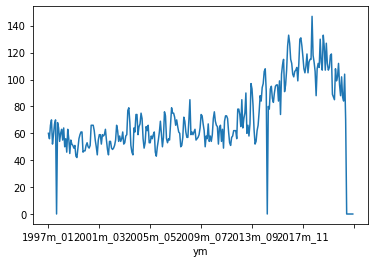

In [33]:
observ.plot()

In [34]:
observ[observ==0]

ym
1997m_09    0
2014m_12    0
2021m_06    0
2021m_07    0
2021m_08    0
2021m_09    0
2021m_10    0
2021m_11    0
2021m_12    0
Name: volumen, dtype: int64

Hay 9 meses con ninguna observación para volumen: set 1997, dic 2014 y junio-diciembre 2021

Atención a meses sin observaciones (NaN). No es razonable que no haya ninguna transacción de papa durante todo un mes. Para junio-dic 2021 el tema es que los datos obtenidos de la web sólo llegaban a mayo 2021. Estos meses se pueden eliminar. Para los otros dos meses de la serie debemos tomar decisión. Decidimos, ya que no hay información sobre transacciones (sin saber la causa de dicha situación), eliminar estos dos meses de la serie. 

In [35]:
df_base1 = df_base[(df_base['ym'] != '1997m_09') & (df_base['ym'] != '2014m_12') &
                    (df_base['ym'] != '2021m_06') & (df_base['ym'] != '2021m_07') & 
                    (df_base['ym'] != '2021m_08') & (df_base['ym'] != '2021m_09') & 
                    (df_base['ym'] != '2021m_10') & (df_base['ym'] != '2021m_11') & 
                    (df_base['ym'] != '2021m_12')]


In [36]:
df_base1.sort_values('ym')

,producto,year,provincia,mes,volumen,precio,ym
0,Papa Amarilla,1997,Abancay,m_01,NaN,0.90,1997m_01
96,Papa Color,1997,Huaral,m_01,622.44,0.55,1997m_01
95,Papa Color,1997,Huanuco,m_01,5306.76,0.55,1997m_01
94,Papa Color,1997,Huancayo,m_01,558.96,0.55,1997m_01
93,Papa Color,1997,Huancavelica,m_01,24.00,0.55,1997m_01
...,...,...,...,...,...,...,...
20951,Papa Canchan,2021,Arequipa,m_05,NaN,1.38,2021m_05
20952,Papa Canchan,2021,Barranca,m_05,NaN,1.38,2021m_05
20953,Papa Canchan,2021,Cangallo,m_05,NaN,1.38,2021m_05
20946,Papa Blanca,2021,Satipo,m_05,NaN,0.79,2021m_05


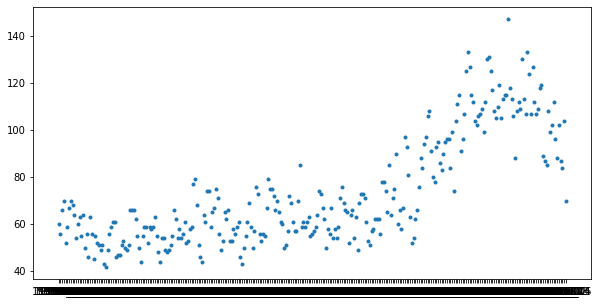

In [37]:
observ1=df_base1.groupby(df_base.ym)['volumen'].count()
plt.figure(figsize=(10,5))
plt.scatter(observ1.index, observ1, marker='.')
plt.show()

In [38]:
df_base1.volumen.isna().sum()

27928

La variable volumen tiene muchos valores como NaN. En este caso le asignaremos el valor de 0 porque en dicho mes en la provincia no hubo oferta pese a que sí se formó precio

In [39]:
df_base1.volumen.fillna(0, inplace=True)
df_base1.describe()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,year,volumen,precio
count,49261.000000,49261.000000,49181.000000
mean,2010.441181,249.047493,0.888293
std,6.959967,972.743971,0.427099
min,1997.000000,0.000000,0.280000
25%,2005.000000,0.000000,0.610000
50%,2012.000000,0.000000,0.770000
75%,2017.000000,45.000000,1.060000
max,2021.000000,16033.000000,3.320000


In [40]:
df_base1.precio.isna().sum()

80

La variable precio tiene observaciones con NaN.  Vemos de qué se trata

In [42]:
bb_pna=df_base1[df_base1.precio.isna()]

In [44]:
bb_pna

,producto,year,provincia,mes,volumen,precio,ym
1416,Papa Huamantanga,2007,Huamanga,m_01,0.0,NaN,2007m_01
1417,Papa Huamantanga,2007,Jauja,m_01,0.0,NaN,2007m_01
1418,Papa Huamantanga,2007,Procedencia Desconocida,m_01,0.0,NaN,2007m_01
1419,Papa Huamantanga,2007,Tarma,m_01,0.0,NaN,2007m_01
1429,Papa Perricholi,2007,Arequipa,m_01,0.0,NaN,2007m_01
...,...,...,...,...,...,...,...
50292,Papa Perricholi,2020,Canete,m_12,0.0,NaN,2020m_12
50293,Papa Perricholi,2020,Huanuco,m_12,0.0,NaN,2020m_12
50294,Papa Perricholi,2020,Huaral,m_12,0.0,NaN,2020m_12
50295,Papa Perricholi,2020,Huaura,m_12,0.0,NaN,2020m_12


In [43]:
bb_pna.producto.unique()

array(['Papa Huamantanga', 'Papa Perricholi', 'Papa Peruanita',
       'Papa Negra Andina'], dtype=object)

In [45]:
df_base1.dropna(subset=['precio'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


La base df_base1 ha pasado por una primera limpieza donde se han hecho los siguientes ajustes: (i) eliminamos meses sin observaciones; (ii) asignamos 0 a observaciones con volumen=NaN; (iii) eliminamos observaciones donde precio=NaN

In [46]:
df_base1.describe(include='all')

,producto,year,provincia,mes,volumen,precio,ym
count,49181,49181.000000,49059,49181,49181.000000,49181.000000,49181
unique,11,NaN,121,12,NaN,NaN,291
top,Papa Blanca,NaN,Huancayo,m_05,NaN,NaN,2019m_09
freq,16169,NaN,1993,4221,NaN,NaN,257
mean,NaN,2010.433521,NaN,NaN,249.452605,0.888293,NaN
std,NaN,6.958589,NaN,NaN,973.482916,0.427099,NaN
min,NaN,1997.000000,NaN,NaN,0.000000,0.280000,NaN
25%,NaN,2005.000000,NaN,NaN,0.000000,0.610000,NaN
50%,NaN,2012.000000,NaN,NaN,0.000000,0.770000,NaN
75%,NaN,2016.000000,NaN,NaN,45.000000,1.060000,NaN


Esta es una primera base "limpia" y "ordenada" con la que se puede iniciar el análisis exploratorio.

## **3. Primer análisis exploratorio**


Veremos el comportamiento de las variedades (su dinámica), primero cambiamos el nombre de la columna 'producto' por 'variedad'

In [47]:
df_base1.rename(columns={'producto':'variedad'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Miramos las variables de precio y volumen por variedad usando **groupby**

In [48]:
df_base1.groupby(df_base1['variedad']).agg({'precio':['count','mean','min','max'], 'year':'min'})

precio                        year
                   count      mean   min   max   min
variedad                                            
Papa Amarilla       5934  1.300104  0.58  3.32  1997
Papa Blanca        16169  0.705430  0.30  2.09  1997
Papa Canchan        2955  0.995898  0.37  2.26  2007
Papa Color         10950  0.737363  0.28  2.22  1997
Papa Huamantanga     501  1.283214  0.71  2.63  2006
Papa Huayro         2913  1.116382  0.48  2.56  1997
Papa Negra Andina    670  0.995746  0.57  2.24  2006
Papa Perricholi     1686  0.873950  0.28  2.02  2006
Papa Peruanita      1692  1.490077  0.73  2.93  2006
Papa Unica          2432  0.892693  0.29  2.18  2006
Papa Yungay         3279  0.860448  0.43  2.19  2006

In [49]:
df_base1.groupby(df_base1['variedad']).agg({'volumen':['count','mean','min','max'], 'year':'min'})

volumen                             year
                    count        mean  min       max   min
variedad                                                  
Papa Amarilla        5934   95.559961  0.0   4080.00  1997
Papa Blanca         16169  551.838563  0.0  16033.00  1997
Papa Canchan         2955  107.594585  0.0   5632.00  2007
Papa Color          10950  160.764616  0.0   9316.01  1997
Papa Huamantanga      501    2.385230  0.0     76.00  2006
Papa Huayro          2913   20.643831  0.0   1690.00  1997
Papa Negra Andina     670    3.737313  0.0     93.00  2006
Papa Perricholi      1686   10.087189  0.0    460.00  2006
Papa Peruanita       1692   13.674941  0.0    441.00  2006
Papa Unica           2432   64.594572  0.0   3225.00  2006
Papa Yungay          3279  133.946325  0.0   4876.00  2006

Miramos la evolución de la oferta anual de algunas variedades

## 3.1.  Dinámica de oferta y precios

### Papa Blanca

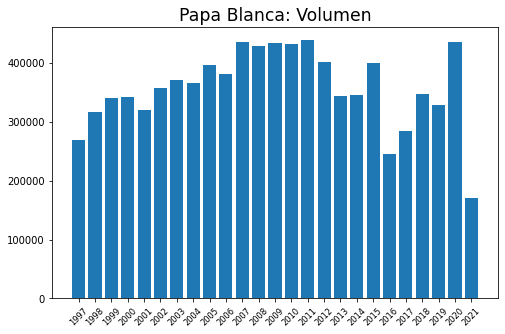

In [50]:
plt.figure(figsize=(8,5))
vol_blanca=df_base1[['year','volumen']][df_base1.variedad=="Papa Blanca"].groupby('year').sum()
plt.bar(vol_blanca.index,vol_blanca.volumen)
plt.title("Papa Blanca: Volumen", fontsize='xx-large')
plt.xticks(vol_blanca.index,rotation=45, fontsize='small')
plt.show()

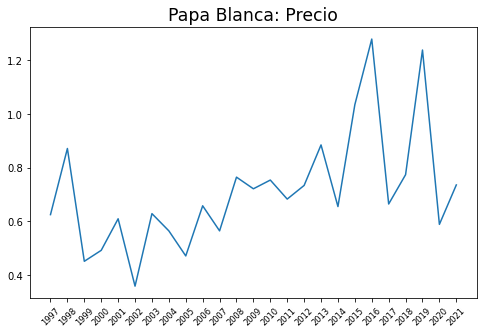

In [51]:
plt.figure(figsize=(8,5))
pre_blanca=df_base1[['year','precio']][df_base1.variedad=="Papa Blanca"].groupby('year').mean()
plt.plot(pre_blanca.index,pre_blanca.precio)
plt.title("Papa Blanca: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Yungay

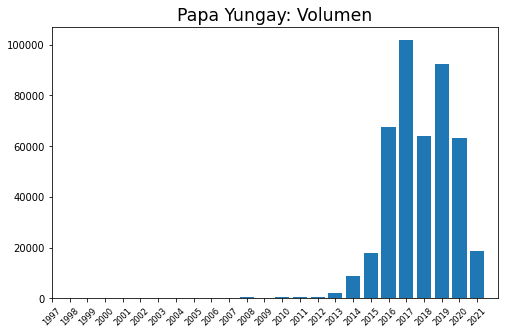

In [52]:
plt.figure(figsize=(8,5))
vol_yungay=df_base1[['year','volumen']][df_base1.variedad=="Papa Yungay"].groupby('year').sum()
plt.bar(vol_yungay.index,vol_yungay.volumen)
plt.title("Papa Yungay: Volumen", fontsize='xx-large')
plt.xticks(vol_blanca.index,rotation=45, fontsize='small')
plt.show()

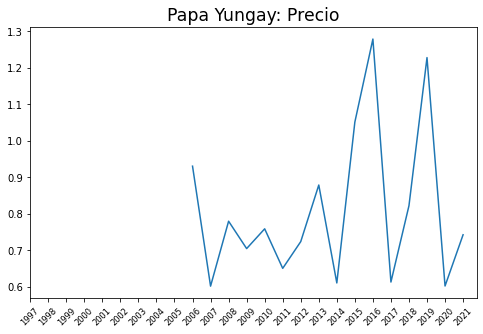

In [53]:
plt.figure(figsize=(8,5))
pre_yungay=df_base1[['year','precio']][df_base1.variedad=="Papa Yungay"].groupby('year').mean()
plt.plot(pre_yungay.index,pre_yungay.precio)
plt.title("Papa Yungay: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Huayro

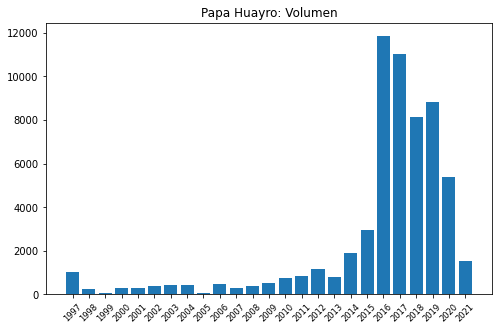

In [58]:
plt.figure(figsize=(8,5))
vol_huayro=df_base1[['year','volumen']][df_base1.variedad=="Papa Huayro"].groupby('year').sum()
plt.bar(vol_huayro.index,vol_huayro.volumen)
plt.title("Papa Huayro: Volumen")
plt.xticks(vol_huayro.index,rotation=45, fontsize='small')
plt.show()

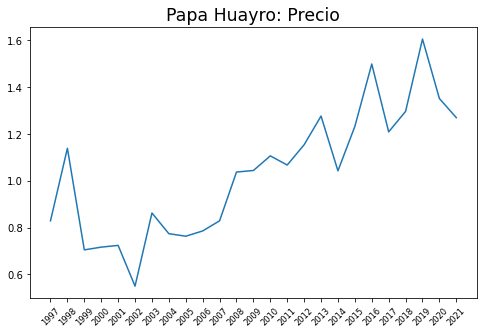

In [59]:
plt.figure(figsize=(8,5))
pre_huayro=df_base1[['year','precio']][df_base1.variedad=="Papa Huayro"].groupby('year').mean()
plt.plot(pre_huayro.index,pre_huayro.precio)
plt.title("Papa Huayro: Precio", fontsize='xx-large')
plt.xticks(pre_huayro.index,rotation=45, fontsize='small')
plt.show()

### Papa Canchan

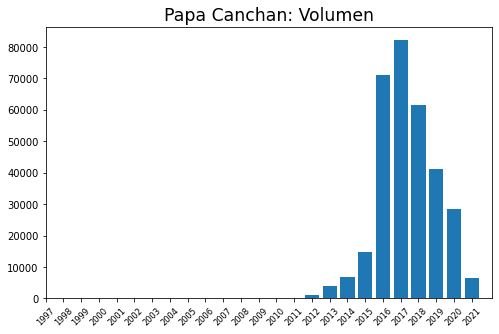

In [60]:
plt.figure(figsize=(8,5))
vol_canchan=df_base1[['year','volumen']][df_base1.variedad=="Papa Canchan"].groupby('year').sum()
plt.bar(vol_canchan.index,vol_canchan.volumen)
plt.title("Papa Canchan: Volumen", fontsize='xx-large')
plt.xticks(vol_blanca.index,rotation=45, fontsize='small')
plt.show()

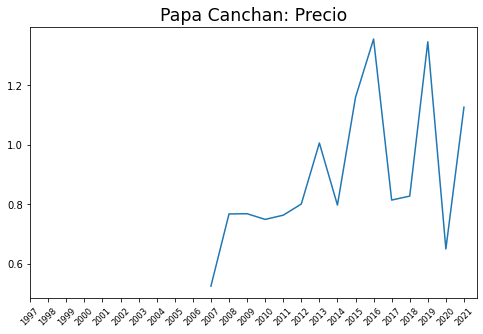

In [61]:
plt.figure(figsize=(8,5))
pre_canchan=df_base1[['year','precio']][df_base1.variedad=="Papa Canchan"].groupby('year').mean()
plt.plot(pre_canchan.index,pre_canchan.precio)
plt.title("Papa Canchan: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Amarilla

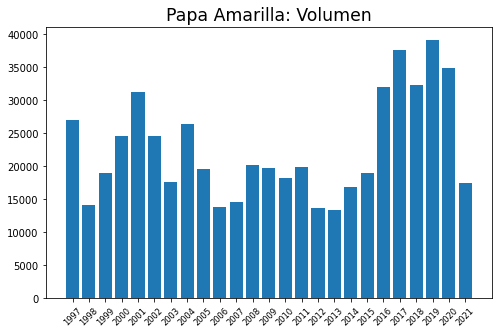

In [63]:
plt.figure(figsize=(8,5))
vol_amarilla=df_base1[['year','volumen']][df_base1.variedad=="Papa Amarilla"].groupby('year').sum()
plt.bar(vol_amarilla.index,vol_amarilla.volumen)
plt.title("Papa Amarilla: Volumen", fontsize='xx-large')
plt.xticks(vol_amarilla.index,rotation=45, fontsize='small')
plt.show()

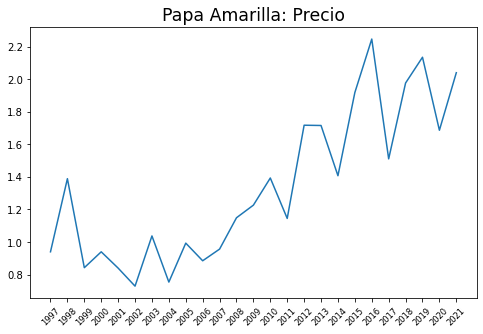

In [64]:
plt.figure(figsize=(8,5))
pre_amarilla=df_base1[['year','precio']][df_base1.variedad=="Papa Amarilla"].groupby('year').mean()
plt.plot(pre_amarilla.index,pre_amarilla.precio)
plt.title("Papa Amarilla: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Color

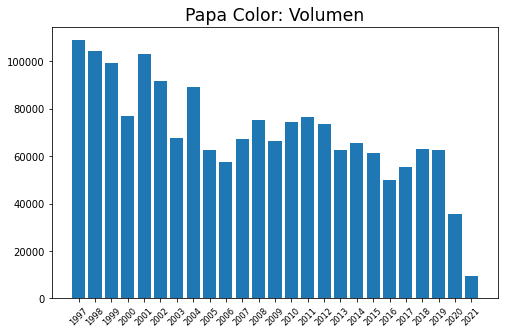

In [65]:
plt.figure(figsize=(8,5))
vol_color=df_base1[['year','volumen']][df_base1.variedad=="Papa Color"].groupby('year').sum()
plt.bar(vol_color.index,vol_color.volumen)
plt.title("Papa Color: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

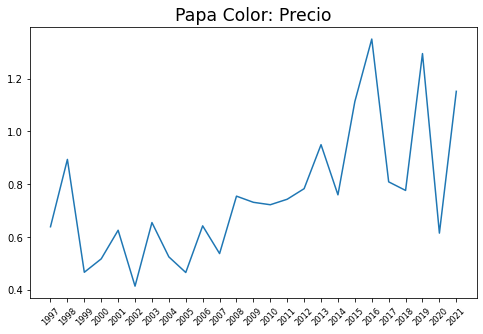

In [66]:
plt.figure(figsize=(8,5))
pre_color=df_base1[['year','precio']][df_base1.variedad=="Papa Color"].groupby('year').mean()
plt.plot(pre_color.index,pre_color.precio)
plt.title("Papa Color: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Unica

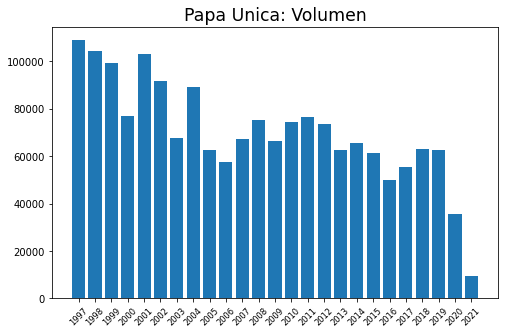

In [75]:
plt.figure(figsize=(8,5))
vol_unica=df_base1[['year','volumen']][df_base1.variedad=="Papa Unica"].groupby('year').sum()
plt.bar(vol_color.index,vol_color.volumen)
plt.title("Papa Unica: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

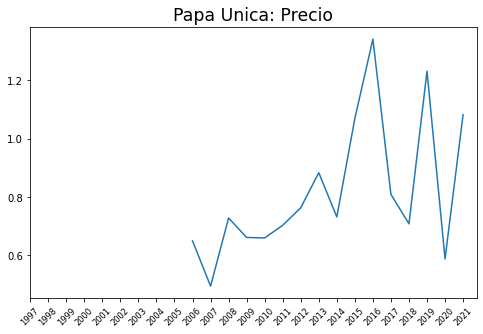

In [77]:
plt.figure(figsize=(8,5))
pre_unica=df_base1[['year','precio']][df_base1.variedad=="Papa Unica"].groupby('year').mean()
plt.plot(pre_unica.index,pre_unica.precio)
plt.title("Papa Unica: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Peruanita

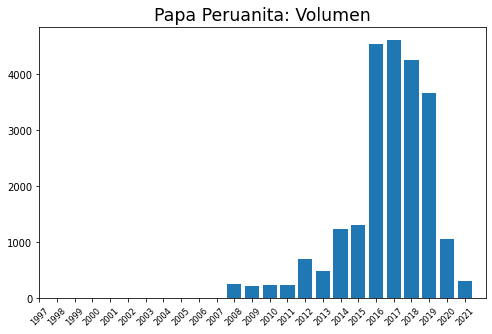

In [78]:
plt.figure(figsize=(8,5))
vol_peruanita=df_base1[['year','volumen']][df_base1.variedad=="Papa Peruanita"].groupby('year').sum()
plt.bar(vol_peruanita.index,vol_peruanita.volumen)
plt.title("Papa Peruanita: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

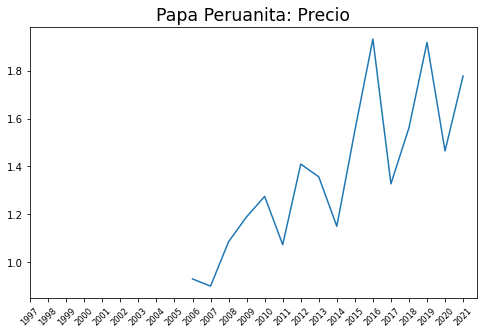

In [79]:
plt.figure(figsize=(8,5))
pre_peruanita=df_base1[['year','precio']][df_base1.variedad=="Papa Peruanita"].groupby('year').mean()
plt.plot(pre_peruanita.index,pre_peruanita.precio)
plt.title("Papa Peruanita: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

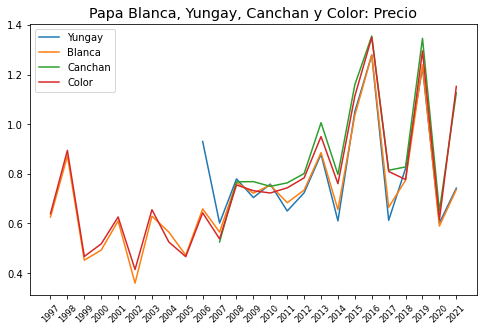

In [68]:
plt.figure(figsize=(8,5))
plt.plot(pre_yungay.index,pre_yungay.precio,label='Yungay')
plt.plot(pre_blanca.index,pre_blanca.precio, label='Blanca')
plt.plot(pre_canchan.index,pre_canchan.precio, label='Canchan')
plt.plot(pre_color.index,pre_color.precio, label='Color')
plt.title("Papa Blanca, Yungay, Canchan y Color: Precio", fontsize='x-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.legend()
plt.show()

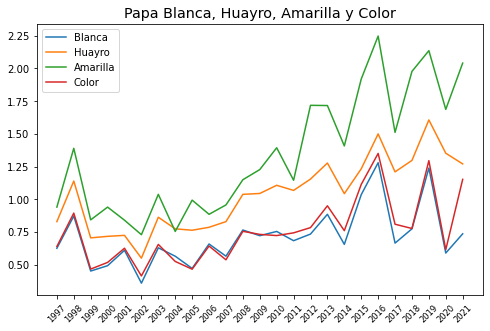

In [74]:
plt.figure(figsize=(8,5))
plt.plot(pre_blanca.index,pre_blanca.precio, label='Blanca')
plt.plot(pre_huayro.index,pre_huayro.precio, label='Huayro')
plt.plot(pre_amarilla.index,pre_amarilla.precio, label='Amarilla')
plt.plot(pre_color.index,pre_color.precio, label='Color')
plt.title("Papa Blanca, Huayro, Amarilla y Color", fontsize='x-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.legend()
plt.show()

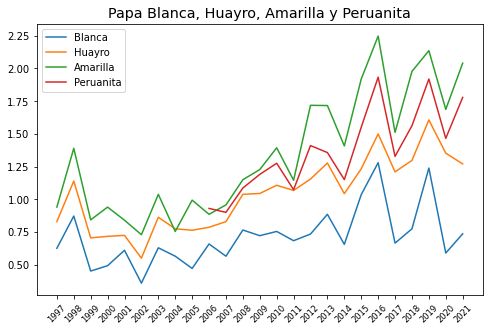

In [81]:
plt.figure(figsize=(8,5))
plt.plot(pre_blanca.index,pre_blanca.precio, label='Blanca')
plt.plot(pre_huayro.index,pre_huayro.precio, label='Huayro')
plt.plot(pre_amarilla.index,pre_amarilla.precio, label='Amarilla')
plt.plot(pre_peruanita.index,pre_peruanita.precio, label='Peruanita')
plt.title("Papa Blanca, Huayro, Amarilla y Peruanita", fontsize='x-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.legend()
plt.show()

## 3.2. Análisis de provincias de origen

### Papa Blanca

In [ ]:
prv_blanca=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Blanca"].groupby('provincia').sum()
prv_blanca.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,1505347.33
Huamanga,1090051.81
Huancayo,1068481.70
Tarma,570348.69
Huaral,566592.05
Jauja,563047.24
Barranca,493371.74
Pasco,468714.82
Ica,330128.92


### Papa Yungay

In [ ]:
prv_yungay=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Yungay"].groupby('provincia').sum()
prv_yungay.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,146601.0
Tarma,78764.0
Huancayo,53188.0
Huamanga,44934.0
Jauja,29073.0
Pasco,13757.0
Barranca,12204.0
Ica,9150.0
Arequipa,6864.0


### Papa Canchan

In [ ]:
prv_canchan=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Canchan"].groupby('provincia').sum()
prv_canchan.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huamanga,107584.0
Huanuco,37006.0
Barranca,27276.0
Ica,26439.0
Huancayo,25109.0
Nazca,21901.0
Jauja,14912.0
Arequipa,14776.0
Tarma,13929.0


### Papa Huayro

In [ ]:
prv_huayro=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Huayro"].groupby('provincia').sum()
prv_huayro.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,25659.19
Andahuaylas,13443.85
Pasco,9153.10
Huancayo,3097.21
Ambo,2335.40
Procedencia Desconocida,1779.01
Huamanga,1276.44
Junin,1066.58
Tarma,355.51


### Papa Amarilla

In [ ]:
prv_amarilla=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Amarilla"].groupby('provincia').sum()
prv_amarilla.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,267630.58
Ambo,180330.73
Pasco,23203.96
Huancayo,22528.25
Andahuaylas,22086.03
Huamanga,16293.65
Tarma,9092.56
Procedencia Desconocida,6303.80
Jauja,3459.60


### Papa Color

In [ ]:
prv_color=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Color"].groupby('provincia').sum()
prv_color.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,504661.90
Pasco,227303.03
Huamanga,159766.66
Huancayo,140268.71
Andahuaylas,102378.62
Barranca,81029.10
Tarma,71427.46
Ica,63855.36
Jauja,62850.24


### Papa Unica

In [82]:
prv_unica=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Unica"].groupby('provincia').sum()
prv_unica.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Arequipa,31016.0
Barranca,27306.0
Ica,24169.0
Huaral,18174.0
Nazca,14663.0
Canete,8486.0
Huaura,7834.0
Huancayo,6080.0
Huanuco,3868.0


## Papa Peruanita

In [83]:
prv_peruanita=df_base1[['provincia','volumen']][df_base1.variedad=="Papa Peruanita"].groupby('provincia').sum()
prv_peruanita.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Andahuaylas,8719.0
Huamanga,6667.0
Huancayo,3490.0
Huanuco,2429.0
Pasco,322.0
Ambo,222.0
Tarma,170.0
Abancay,165.0
Tayacaja,125.0


Vemos que en las variedades Blanca, Yungay, Canchan, Color y Unica la sierra compite con la costa.  En variedades como Huayro, Amarilla y Peruanita la oferta sólo proviene de la sierra.

## 3.3. Peso relativo de las provincias

Creamos variable de valor (precio*volumen) para cada observación. Esta variable está en millones de soles

In [88]:
df_base1['valor']=(df_base1['volumen']*df_base1['precio'])/1000

<ipython-input-88-7307ac343a81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base1['valor']=(df_base1['volumen']*df_base1['precio'])/1000


In [89]:
df_base1.valor.describe()

count    49181.000000
mean         0.188129
std          0.732305
min          0.000000
25%          0.000000
50%          0.000000
75%          0.037410
max         17.654500
Name: valor, dtype: float64

Generamos ranking de provincias de acuerdo a valor total de papa enviada a Lima entre 1997 y mayo 2021

In [90]:
rank_prov=df_base1.groupby(df_base.provincia)['valor'].sum()

In [93]:
prov_19=rank_prov.sort_values(ascending=False)[0:19].sum()

In [94]:
prov_resto=rank_prov.sort_values(ascending=False)[19:121].sum()

In [95]:
prov_19/(prov_19+prov_resto)


0.9641109874444748

19 provincias generan el 96.4% del valor total de la papa enviada a Lima, entonces tiene sentido acotar la base solamente a esas 20 provincias

In [96]:
rank_prov.sort_values(ascending=False)[0:19]

provincia
Huanuco         1960.775207
Huamanga        1026.134496
Huancayo         988.441447
Tarma            585.896933
Ambo             550.784248
Pasco            518.783818
Jauja            458.873311
Barranca         456.123681
Huaral           403.905902
Ica              360.219732
Nazca            320.245712
Arequipa         308.419819
Andahuaylas      302.172962
Canete           219.975414
Huaura           137.658777
Lima              91.960116
Huancavelica      89.124340
Tayacaja          72.771886
Junin             68.027331
Name: valor, dtype: float64

In [97]:
df_base2=df_base1[df_base1["provincia"].isin(['Huanuco','Huamanga','Huancayo','Tarma','Ambo','Pasco','Jauja',
          'Barranca','Huaral','Ica','Nazca','Arequipa','Andahuaylas','Canete', 'Huaura', 'Lima', 
          'Huancavelica', 'Tayacaja', 'Junin'])]

In [98]:
df_base2.provincia.unique()

array(['Ambo', 'Andahuaylas', 'Arequipa', 'Canete', 'Huamanga',
       'Huancavelica', 'Huancayo', 'Huanuco', 'Jauja', 'Junin', 'Lima',
       'Pasco', 'Tarma', 'Tayacaja', 'Barranca', 'Huaral', 'Huaura',
       'Ica', 'Nazca'], dtype=object)

In [99]:
df_base2.describe(include='all')

,variedad,year,provincia,mes,volumen,precio,ym,valor
count,27038,27038.000000,27038,27038,27038.000000,27038.000000,27038,27038.000000
unique,11,NaN,19,12,NaN,NaN,291,NaN
top,Papa Blanca,NaN,Huancayo,m_05,NaN,NaN,2019m_02,NaN
freq,5524,NaN,1993,2338,NaN,NaN,154,NaN
mean,NaN,2011.343960,NaN,NaN,437.335518,0.943954,NaN,0.329917
std,NaN,6.808921,NaN,NaN,1279.957867,0.449100,NaN,0.962372
min,NaN,1997.000000,NaN,NaN,0.000000,0.280000,NaN,0.000000
25%,NaN,2006.000000,NaN,NaN,0.000000,0.630000,NaN,0.000000
50%,NaN,2013.000000,NaN,NaN,14.400000,0.820000,NaN,0.012000
75%,NaN,2017.000000,NaN,NaN,193.000000,1.150000,NaN,0.161061


La base **df_base2** puede ser utilizada para el modelamiento y análisis del mercado de papa (en sus distintas variedades) de Lima Metropolitana.

In [100]:
df_base2.to_excel('df_base2.xlsx')